# Final Project: Music Trends and Popularity Analysis

## Name: <span style="color:blue"> *Anthony Lee* </span>

## Utils

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Overview


## Spotify Dataset: 1921-2020, 600k+ Tracks

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Spotify_logo_without_text.svg/512px-Spotify_logo_without_text.svg.png" width=300></center>

This project explores the Spotify Dataset, a comprehensive collection of over 600,000 tracks spanning nearly a century (1921-2020). The dataset includes a variety of features related to music tracks, such as their loudness, danceability, tempo, energy, and acousticness, along with popularity scores for each song.

[The Spotify dataset](https://www.kaggle.com/datasets/) is frequently used for music-related machine learning tasks, as it offers a blend of audio characteristics and popularity metrics. Below are key details of the dataset:

- **Number of Instances**: 600,000+
- **Number of Features**: 20+ (e.g., `loudness`, `tempo`, `valence`, etc.)
- **Target Variable**: `popularity` (ranging from 0 to 100)
- **Attribute Information**:
    - `loudness`: Measures the perceived volume of the song in decibels.
    - `tempo`: The estimated speed or pace of the song, measured in beats per minute (BPM).
    - `danceability`: Describes how suitable a track is for dancing.
    - `acousticness`: Indicates the likelihood of the track being acoustic.
    - `energy`: Measures the intensity and activity of the track.
- **Missing Attri selected features.

The goal of this project is to predict whether a song is "popular" or "not popular" using machine learning algorithms (K-Nearest Neighbors and Logistic Regression). By analyzing these features and understanding pattare able to get anta, we am to uncover insights inconnect deeplymakes a song re around the world and what can make a song popular and not so populars You ready to learn? Let's dive in and explore :)e_or_URL" width=300></center>


### Data Loading

In [2]:
print(f"The current path for your notebook is:\n {os.getcwd()}\n")
print(f"Your notebook is currently in the following directory:\n {os.path.basename(os.getcwd())}")

The current path for your notebook is:
 C:\Users\LeeAn\Downloads

Your notebook is currently in the following directory:
 Downloads


In [3]:
music_df = pd.read_csv('tracks.csv')

In [4]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
music_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


## Visualization

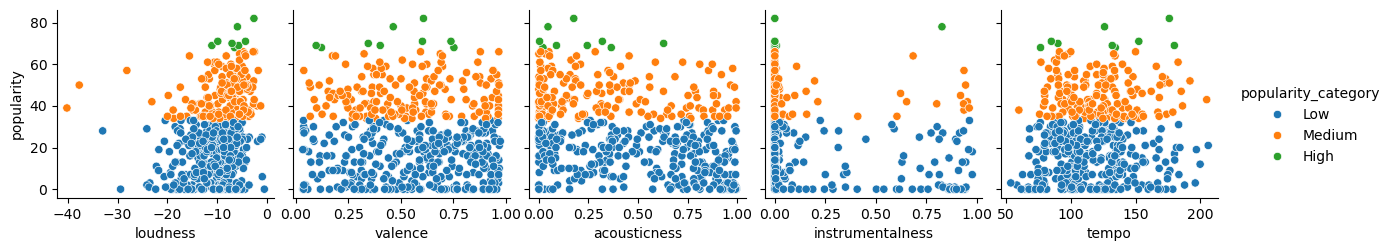

In [6]:
music_df['popularity_category'] = pd.cut(
    music_df['popularity'], bins=3, labels=['Low', 'Medium', 'High']
)

# Randomly sample 500 indices
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(music_df)), size=min(500, len(music_df)), replace=False)

# Select features to visualize
features_to_plot = ['loudness', 'valence', 'acousticness', 'instrumentalness', 'tempo']

#pairplot display
sns.pairplot(
    data=music_df.iloc[indices],
    y_vars='popularity',
    x_vars=features_to_plot,
    hue='popularity_category',
)

plt.show()

## Data Preprocessing

### Data Splitting

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
def train_test_split(
    X: np.ndarray, 
    y: np.ndarray, 
    train_size: float, 
    random_state: int
):
    """ Randomizes and splits the data into train and test sets.

        Args:
            X: Data given as a 2D NumPy array (features).
            y: Labels given as a NumPy array.
            train_size: A number between 0.0 and 1.0 representing 
                        the proportion of the dataset to include in the train split.
            random_state: Seed controlling shuffling applied to the data.

        Returns:
            X_train, X_test, y_train, y_test: Split data arrays.
    """
    # Shuffle data using random_state seed
    rng = np.random.RandomState(random_state)
    random_idx = rng.permutation(len(X))
    X = X[random_idx]
    y = y[random_idx]
    
    # Calculate split index
    split_idx = int(len(X) * train_size)
    
    # Split the data
    X_trn, X_tst = X[:split_idx], X[split_idx:]
    y_trn, y_tst = y[:split_idx], y[split_idx:]
    
    return X_trn, X_tst, y_trn, y_tst


#### Preprocess Data

In [9]:
def get_preprocessed_data(music_df, target_col="is_popular", sample_size=10000):
    """ Preprocess data and perform scaling, with optional downsampling """
    
    # Select features and target
    features = ['loudness', 'acousticness', 'tempo', 'danceability', 'energy']
    music_df = music_df.sample(n=sample_size, random_state=42)
    X = music_df[features].to_numpy()
    y = music_df[target_col].to_numpy()
    
    # Train-test split
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, random_state=42)
    
    # Standardization
    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_tst = scaler.transform(X_tst)
    
    return X_trn, X_tst, y_trn, y_tst


In [10]:
# Define the binary target
threshold = music_df['popularity'].mean()
music_df['is_popular'] = (music_df['popularity'] >= threshold).astype(int)

# Check the distribution of the new target
print("Distribution of is_popular:")
print(music_df['is_popular'].value_counts())

# Now proceed to preprocessing
X_trn, X_tst, y_trn, y_tst = get_preprocessed_data(music_df, target_col="is_popular", sample_size=5000)

Distribution of is_popular:
is_popular
0    298120
1    288552
Name: count, dtype: int64


# Module 1: K-Nearest Neighbors (K-NN)

## Supporting Functions for K-NN

### Euclidean Distance

In [11]:
def euclidean_distance(x: np.ndarray, Y: np.ndarray) -> np.ndarray:
    """ Compute the Euclidean distance between a vector and a matrix.

        Args:
            x: 1D NumPy array (single data sample).
            Y: 2D NumPy array (dataset).

        Return:
            A 1D array of distances between x and all rows in Y.
    """
    assert len(Y.shape) == 2, "Y must be a 2D array (matrix)."
    return np.sqrt(np.sum((Y - x) ** 2, axis=1))

### Accuracy

In [12]:
def accuracy(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the accuracy between true and predicted labels.

        Args:
            y: Ground truth labels (1D array).
            y_hat: Predicted labels (1D array).

        Return:
            Accuracy as a float value.
    """
    y = y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)
    are_same = y == y_hat
    total_correct = np.sum(are_same)
    total_samples = len(y)
    print(f"Accuracy ratio: {total_correct}/{total_samples}")
    return total_correct / total_samples

## K-Nearest Neighbor Implementation

In [13]:
class KNearestNeighbors:
    def __init__(self, k: int, distance_measure=euclidean_distance):
        """ Initialize KNN with a given k and distance measure. """
        self.k = k
        self.distance_measure = distance_measure

    def fit(self, X: np.ndarray, y: np.ndarray):
        """ Store training data for later use. """
        self.X = X
        self.y = y

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Predict labels for input data using the KNN algorithm. """
        y_hats = []
        for x in X:
            distances = self.distance_measure(x, self.X)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y[nearest_indices]
            label_counts = np.bincount(nearest_labels)
            y_hats.append(np.argmax(label_counts))
        return np.array(y_hats)


In [14]:
# Preprocess the data
X_trn, X_tst, y_trn, y_tst = get_preprocessed_data(music_df, target_col="is_popular", sample_size=5000)

for k in [3, 5, 10, 15, 20]:
    knn = KNearestNeighbors(k=k)
    knn.fit(X_trn, y_trn)
    y_pred_knn = knn.predict(X_tst)
    acc = accuracy(y_tst, y_pred_knn)
    print(f"k={k}, Accuracy={acc}")



Accuracy ratio: 610/1000
k=3, Accuracy=0.61
Accuracy ratio: 613/1000
k=5, Accuracy=0.613
Accuracy ratio: 653/1000
k=10, Accuracy=0.653
Accuracy ratio: 668/1000
k=15, Accuracy=0.668
Accuracy ratio: 659/1000
k=20, Accuracy=0.659


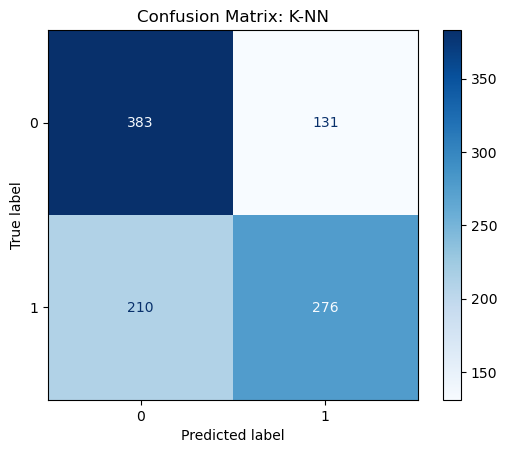

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    """ Plot confusion matrix for a given model """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Slice y_test to match the number of predictions
y_test_ss = y_tst[:len(y_pred_knn)]

# Plot confusion matrix for K-NN
plot_confusion_matrix(y_test_ss, y_pred_knn, model_name="K-NN")

#### 
To Note:
- True Negatives (Top Left, 0-0): The number of songs correctly classified as "Not Popular."
- False Positives (Top Right, 0-1): The number of songs incorrectly classified as "Popular," but they were actually "Not Popular."
- False Negatives (Bottom Left, 1-0): The number of songs incorrectly classified as "Not Popular," but they were actually "Popular."
- True Positives (Bottom Right, 1-1): The number of songs correctly classified as "Popular."


## Module 2: Logistic Regression

In [16]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000):
        """ Initialize Logistic Regression with learning rate and iterations. """
        self.lr = lr
        self.num_iter = num_iter

    def sigmoid(self, z):
        """ Sigmoid activation function. """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """ Train the Logistic Regression model using Gradient Descent. """
        self.theta = np.zeros(X.shape[1])  # Initialize weights
        self.bias = 0                      # Initialize bias term
        
        for i in range(self.num_iter):
            # Linear combination
            z = np.dot(X, self.theta) + self.bias
            h = self.sigmoid(z)
            
            # Compute gradients
            gradient_theta = np.dot(X.T, (h - y)) / y.size
            gradient_bias = np.sum(h - y) / y.size
            
            # Update parameters
            self.theta -= self.lr * gradient_theta
            self.bias -= self.lr * gradient_bias

    def predict(self, X):
        """ Predict probabilities and convert to binary labels. """
        z = np.dot(X, self.theta) + self.bias
        h = self.sigmoid(z)
        return (h >= 0.5).astype(int)


In [17]:
# Preprocess the data
X_trn, X_tst, y_trn, y_tst = get_preprocessed_data(music_df, target_col="is_popular", sample_size=10000)

# Convert y_train and y_test to 1D arrays if needed
y_trn = y_trn.flatten()
y_tst = y_tst.flatten()

# Instantiate and train the Logistic Regression model
log_reg = LogisticRegression(lr=0.01, num_iter=1000)
log_reg.fit(X_trn, y_trn)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_tst)

# Evaluate accuracy
log_reg_accuracy = accuracy(y_tst, y_pred_log_reg)
print(f"Logistic Regression Model Accuracy: {log_reg_accuracy}")


Accuracy ratio: 1314/2000
Logistic Regression Model Accuracy: 0.657


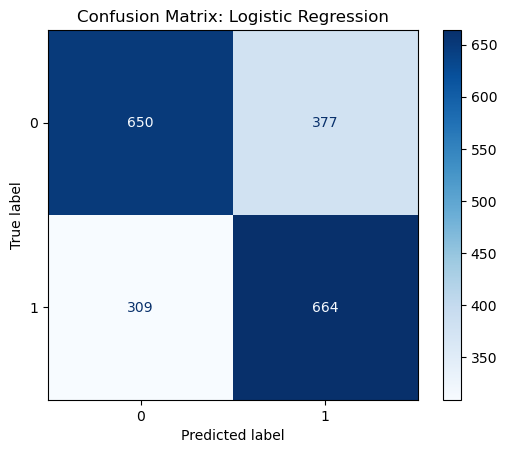

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    """ Plot confusion matrix for a given model """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


# Slice y_test to match the number of predictions for Logistic Regression
y_test_ss = y_tst[:len(y_pred_log_reg)]

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test_ss, y_pred_log_reg, model_name="Logistic Regression")


#### 
To Note:
- True Negatives (Top Left, 0-0): The number of songs correctly classified as "Not Popular."
- False Positives (Top Right, 0-1): The number of songs incorrectly classified as "Popular," but they were actually "Not Popular."
- False Negatives (Bottom Left, 1-0): The number of songs incorrectly classified as "Not Popular," but they were actually "Popular."
- True Positives (Bottom Right, 1-1): The number of songs correctly classified as "Popular."

# ----------------------------------------------------

## Results: Let's Compare

Accuracy ratio: 1327/2000
Accuracy ratio: 1314/2000


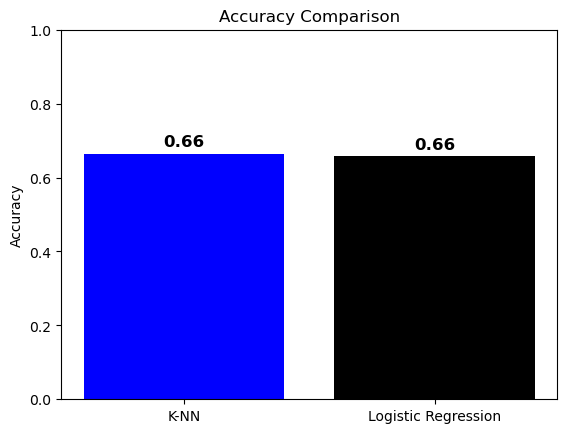

In [19]:
def plot_accuracy_comparison(knn_acc, log_reg_acc):
    """ Plot accuracy comparison between K-NN and Logistic Regression with labels """
    models = ['K-NN', 'Logistic Regression']
    accuracies = [knn_acc, log_reg_acc]
    
    # Create bar chart
    plt.bar(models, accuracies, color=['blue', 'black'])
    plt.title("Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)

    # Add numerical labels on top of bars
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')
    
    plt.show()

# Plot accuracy comparison
# K-NN Accuracy
y_pred_knn = knn.predict(X_tst)  # Ensure K-NN predictions are made
knn_accuracy = accuracy(y_tst[:len(y_pred_knn)], y_pred_knn)

# Logistic Regression Accuracy
y_pred_log_reg = log_reg.predict(X_tst)  # Ensure Logistic Regression predictions are made
log_reg_accuracy = accuracy(y_tst[:len(y_pred_log_reg)], y_pred_log_reg)

# Plot accuracy comparison
plot_accuracy_comparison(knn_accuracy, log_reg_accuracy)


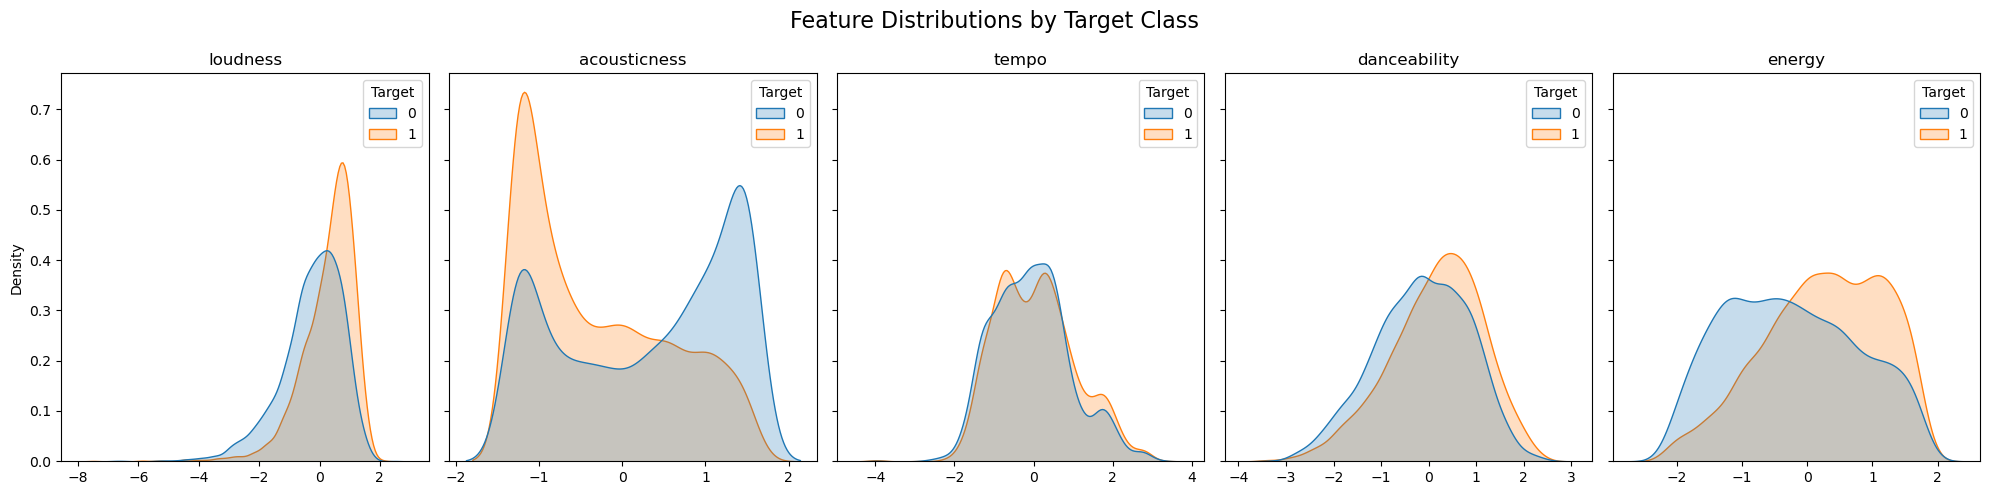

In [20]:
def plot_feature_distributions_horizontal(X, y, feature_names):
    """ Plot distributions of features by target class in a horizontal layout """
    df = pd.DataFrame(X, columns=feature_names)
    df['Target'] = y

    # Set up horizontal subplots
    fig, axes = plt.subplots(1, len(feature_names), figsize=(20, 5), sharey=True)
    fig.suptitle("Feature Distributions by Target Class", fontsize=16)

    for i, feature in enumerate(feature_names):
        sns.kdeplot(
            data=df, x=feature, hue='Target', common_norm=False, fill=True, ax=axes[i]
        )
        axes[i].set_title(feature)
        axes[i].set_xlabel("")
        if i == 0:
            axes[i].set_ylabel("Density")
    
    plt.tight_layout()
    plt.show()

# Feature names
features = ['loudness', 'acousticness', 'tempo', 'danceability', 'energy']

# Plot feature distributions in horizontal layout
plot_feature_distributions_horizontal(X_trn, y_trn, features)


**This visualization illustrates the distribution of key features (loudness, acousticness, tempo, danceability, energy) across the two target classes ('Not Popular' and 'Popular') in a horizontal layout, highlighting patterns and overlaps that contribute to model (K-NN and Logicistic Regression) performance and decision-making.**